# TF-IDF
1. Term Frequency (TF): Measures how often a word appears in a document. A higher frequency suggests greater importance. If a term appears frequently in a document, it is likely relevant to the document’s content.
```math
TF(t,d) = \frac{\text{Number of times term } t \text{ appears in Doc } D}{\text{Total number of terms in doc } D}
```
2. Inverse Document Frequency (IDF): Reduces the weight of common words across multiple documents while increasing the weight of rare words. If a term appears in fewer documents, it is more likely to be meaningful and specific.



```math
TF(t,I) = \frac{\text{Number of times term } t \text{ appears in Doc } D}{\text{Total number of terms in doc }D} 
```

This balance allows TF-IDF to highlight terms that are both frequent within a specific document and distinctive across the text document, making it a useful tool for tasks like search ranking, text classification and keyword extraction.



In [42]:
import numpy as np

a = "Resistor of 10k Ohm ±5% tolerance"
b = "Capacitor of 10uF ±10% capacitance" 
c = "Resistor of 5k Ohm ±1% tolerance"

docs = [a, b, c]

def tf_idf(term, document) -> float:
    doc = document.lower().split()
    tf = doc.count(term.lower()) / len(doc)
    idf = np.log10(len(docs) / sum(1 for d in docs if term.lower() in d.lower().split()))
    return float(round(tf * idf, 5))


In [43]:
tf_idf("Resistor", a)

0.02935

In [44]:
# TF-IDF vectorization
# Lets create a set first of all the terms in the corpus
terms = set()
for document in docs:
    for term in document.lower().split():
        terms.add(term)
print(terms)

{'±1%', 'ohm', '±10%', 'capacitor', '±5%', 'resistor', '10k', 'tolerance', '10uf', '5k', 'of', 'capacitance'}


In [45]:
vec_a = []
vec_b = []
vec_c = []

for term in terms:
    vec_a.append(tf_idf(term, a))
    vec_b.append(tf_idf(term, b))
    vec_c.append(tf_idf(term, c))

In [46]:
print(vec_a)

[0.0, 0.02935, 0.0, 0.0, 0.07952, 0.02935, 0.07952, 0.02935, 0.0, 0.0, 0.0, 0.0]


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(docs)

In [38]:
print('\nWord indexes:')
print(tfidf.vocabulary_)


Word indexes:
{'resistor': 8, 'of': 6, '10k': 1, 'ohm': 7, 'tolerance': 9, 'capacitor': 5, '10uf': 2, '10': 0, 'capacitance': 4, '5k': 3}


In [39]:
print('\ntf-idf value:')
print(result)


tf-idf value:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 15 stored elements and shape (3, 10)>
  Coords	Values
  (0, 8)	0.43306684852870914
  (0, 6)	0.33631504064053513
  (0, 1)	0.5694308628404254
  (0, 7)	0.43306684852870914
  (0, 9)	0.43306684852870914
  (1, 6)	0.2832169249871526
  (1, 5)	0.479527938028855
  (1, 2)	0.479527938028855
  (1, 0)	0.479527938028855
  (1, 4)	0.479527938028855
  (2, 8)	0.43306684852870914
  (2, 6)	0.33631504064053513
  (2, 7)	0.43306684852870914
  (2, 9)	0.43306684852870914
  (2, 3)	0.5694308628404254


In [27]:
for term, tf_idf_vector in zip(tfidf.get_feature_names_out(), result.toarray().T):
    print(f"{term}: {tf_idf_vector}")

10: [0.         0.47952794 0.        ]
10k: [0.56943086 0.         0.        ]
10uf: [0.         0.47952794 0.        ]
5k: [0.         0.         0.56943086]
capacitance: [0.         0.47952794 0.        ]
capacitor: [0.         0.47952794 0.        ]
of: [0.33631504 0.28321692 0.33631504]
ohm: [0.43306685 0.         0.43306685]
resistor: [0.43306685 0.         0.43306685]
tolerance: [0.43306685 0.         0.43306685]


In [34]:
tfidf_matrix = result.toarray()
print(tfidf_matrix)

[[0.         0.56943086 0.         0.         0.         0.
  0.33631504 0.43306685 0.43306685 0.43306685]
 [0.47952794 0.         0.47952794 0.         0.47952794 0.47952794
  0.28321692 0.         0.         0.        ]
 [0.         0.         0.         0.56943086 0.         0.
  0.33631504 0.43306685 0.43306685 0.43306685]]


# BM25 parameters
It’s an improved version of the traditional TF-IDF (Term Frequency–Inverse Document Frequency) 
- It measures term frequency and document relevance more accurately.
- It accounts for document length normalization, giving fair weight to all documents.
- It is widely used in tools like Elasticsearch, Whoosh and Lucene.

## Term Frequency
Term frequency measures how often a query term appears in a document. Intuitively, a document containing a query term multiple times is more likely to be relevant. However, BM25 introduces a saturation effect i.e beyond a certain point, additional occurrences of a term contribute less to the score. This prevents overly long documents from being unfairly favored.

## IDF
Inverse document frequency measures the importance of a term across the entire corpus. Rare terms are considered more informative than common ones. For example, the word "the" appears in almost every document and thus carries little value, whereas a rare term like "quantum" is more indicative of relevance.



In [57]:
a = "Resistor of 10k Ohm ±5% tolerance is used in voltage divider circuits.".lower()
b = "Capacitor of 10uF ±10% capacitance is used in filter circuits.".lower()
c = "Resistor of 5k Ohm ±1% tolerance is used in amplifier circuits.".lower()
d = "Inductor of 10mH ±5% inductance is used in oscillator circuits.".lower()
docs = [a, b, c, d]
print(docs)

['resistor of 10k ohm ±5% tolerance is used in voltage divider circuits.', 'capacitor of 10uf ±10% capacitance is used in filter circuits.', 'resistor of 5k ohm ±1% tolerance is used in amplifier circuits.', 'inductor of 10mh ±5% inductance is used in oscillator circuits.']


In [66]:
import numpy as np

# Calculate average document length
d_avg = sum(len(doc.split()) for doc in docs) / len(docs)

def bm25(term, document, k1=1.5, b=0.75) -> float :   
    doc = document.split()
    term = term.lower()
    N = len(docs)
    freq = doc.count(term)
    # Term Frequency (TF) component
    TF = (freq * (k1 + 1)) / (freq + k1 * (1 - b + b * (len(doc) / d_avg)))

    N_q = sum(1 for d in docs if term in d.split())
    IDF = np.log10((N - N_q + 0.5) / (N_q + 0.5) + 1)
    
    return float(round(TF * IDF, 5))


In [67]:
print(bm25("Resistor", a))
print(bm25("Capacitor", a))

0.28606
0.0


# SBERT
Sentence Transformer is a model that generates fixed-length vector representations (embeddings) for sentences or longer pieces of text, unlike traditional models that focus on word-level embeddings. 

Sentence Transformers leverage transformer-based architectures such as BERT (Bidirectional Encoder Representations from Transformers) to generate these embeddings.

The Sentence-BERT (SBERT) model, introduced by Nils Reimers and Iryna Gurevych in 2019, is one of the most well-known implementations of sentence transformers.

In [74]:
!pip install -U sentence-transformers

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/12.0 MB 7.7 MB/s eta 0:00:02
   ---------- ----------------------------- 3.1/12.0 MB 7.4 MB/s eta 0:00:02
   ------------ --------------------------- 3.7/12.0 MB 7.3 MB/s eta 0:00:02
   ----------------- ---------------------- 5.2/12.0 MB 6.4 MB/s eta 0:00:02
   ---------------------- ----------------- 6.8/12.0 MB 6.6 MB/s eta 0:00:01
   --------------------------- ------------ 8.4/12.0 MB 6.8 MB/s eta 0:00:01
   --------------------------------- ------ 10.0/12.0 MB 6.8 MB/s eta 0:00:01
   -------------------------------------- - 11.5/12.0 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 12.0/12.0 MB 6.8 MB/s  0:00:01
   ---------------------------------------- 0.0/566.1 kB ? eta -:--:--
   ---------------------------------------- 566.1/566.1 kB 6.5 MB/s  0:00:00
   --------

In [81]:
from sentence_transformers import SentenceTransformer, util



In [ ]:
a = "Resistor of 10k Ohm ±5% tolerance is used in voltage divider circuits."
b = "Capacitor of 10uF ±10% capacitance is used in filter circuits."
c = "Resistor of 20k Ohm ±1% tolerance is used in amplifier circuits."
d = "Inductor of 10mH ±5% inductance is used in oscillator circuits."
docs = [a, b, c, d]

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(docs)


[[{'corpus_id': 2, 'score': 0.7419226169586182}, {'corpus_id': 0, 'score': 0.7074537873268127}, {'corpus_id': 3, 'score': 0.41750219464302063}, {'corpus_id': 1, 'score': 0.28547772765159607}]]


In [85]:
query = "What is resistor with 5% tolerance"
query_embedding = model.encode([query])

result = util.semantic_search(query_embedding, embeddings)
print(result)

[[{'corpus_id': 2, 'score': 0.7960848808288574}, {'corpus_id': 0, 'score': 0.7494126558303833}, {'corpus_id': 3, 'score': 0.3207547664642334}, {'corpus_id': 1, 'score': 0.3063914179801941}]]


In [86]:
for row in result:
    for r in row:
        print(f"Document: {docs[r['corpus_id']]}, Score: {r['score']}")

Document: Resistor of 5k Ohm ±1% tolerance is used in amplifier circuits., Score: 0.7960848808288574
Document: Resistor of 10k Ohm ±5% tolerance is used in voltage divider circuits., Score: 0.7494126558303833
Document: Inductor of 10mH ±5% inductance is used in oscillator circuits., Score: 0.3207547664642334
Document: Capacitor of 10uF ±10% capacitance is used in filter circuits., Score: 0.3063914179801941


In [79]:

print(embeddings)
print(embeddings.shape)

[[-0.08364226  0.10634699 -0.05939748 ...  0.08771361  0.02714808
  -0.0056258 ]
 [-0.04374233  0.07587605 -0.02075095 ...  0.12950492  0.09119412
  -0.0091754 ]
 [-0.01986793  0.07068183 -0.02448543 ...  0.05380953  0.09429188
  -0.01071335]
 [-0.05477101  0.06731173 -0.06130544 ...  0.09494355  0.15021259
   0.00759168]]
(4, 384)


In [80]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

print ("\nCosine Similarity Scores:")
# We need to reshape the first embedding to 2D array
print(cosine_similarity(embeddings[0] .reshape(1, -1), embeddings[1].reshape(1, -1)))


Cosine Similarity Scores:
[[0.48748055]]


In [78]:


scores = np.zeros((len(docs), len(docs)))

for i in range(len(docs)):
    for j in range(len(docs)):
        scores[i][j] = cosine_similarity([embeddings[i]], [embeddings[j]])[0][0]
print(scores)

[[1.00000024 0.48748055 0.81380916 0.46881503]
 [0.48748055 1.         0.42907655 0.53185105]
 [0.81380916 0.42907655 1.         0.47240588]
 [0.46881503 0.53185105 0.47240588 1.00000012]]


In [88]:
!pip install seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 7.6 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.1 MB 7.4 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.1 MB 7.3 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 6.5 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.6 MB/s  0:00:01
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------ --------------------- 1.0/2.3 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 6.3 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------- -------------------------------- 1.3/7.0 MB 6.7 MB/s eta 0:00:01
   ---------------- -----------------

Text(0.5, 1.0, 'Cosine Similarity Heatmap')

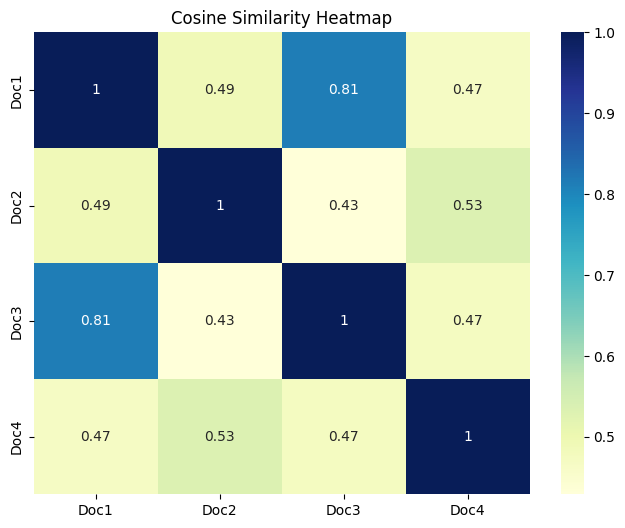

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, xticklabels=['Doc1', 'Doc2', 'Doc3', 'Doc4'], yticklabels=['Doc1', 'Doc2', 'Doc3', 'Doc4'], cmap='YlGnBu')
plt.title('Cosine Similarity Heatmap')

# Observe DOC 1 and DOC 3 have high similarity because both are about resistors with tolerance.
